In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.pipeline import Pipeline

In [3]:
df = pd.read_csv('3-customersatisfaction.csv')

In [4]:
df.head()

,Unnamed: 0,Customer Satisfaction,Incentive
0,0,-1.282447,1.010513
1,1,0.425298,2.281043
2,2,1.953070,4.415053
3,3,2.625838,10.563600
4,4,-1.426333,0.627365


In [5]:
df.drop("Unnamed: 0",axis=1,inplace= True)

In [6]:
df.head()

,Customer Satisfaction,Incentive
0,-1.282447,1.010513
1,0.425298,2.281043
2,1.953070,4.415053
3,2.625838,10.563600
4,-1.426333,0.627365


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Satisfaction  100 non-null    float64
 1   Incentive              100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


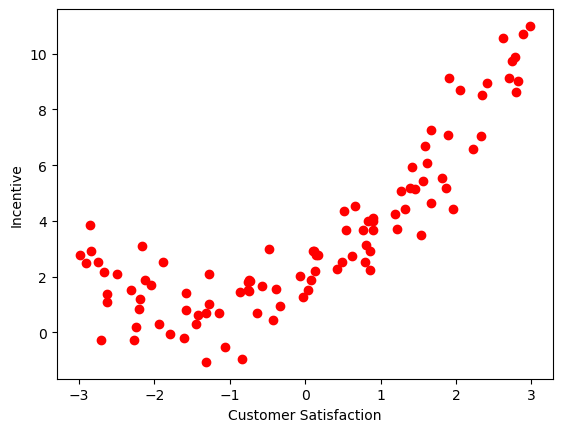

In [8]:
plt.scatter(df["Customer Satisfaction"],df["Incentive"],color="r")
plt.xlabel("Customer Satisfaction")
plt.ylabel("Incentive")
plt.show()

In [9]:
# dependent & independent features
X = df[["Customer Satisfaction"]]
y = df[["Incentive"]]

In [10]:
X.head()

,Customer Satisfaction
0,-1.282447
1,0.425298
2,1.953070
3,2.625838
4,-1.426333


In [11]:
y.head()

,Incentive
0,1.010513
1,2.281043
2,4.415053
3,10.563600
4,0.627365


In [12]:
#train - test split

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=15)

In [14]:
X_train

,Customer Satisfaction
99,0.512504
3,2.625838
20,-0.865714
55,-1.145369
6,2.823460
...,...
28,1.191020
0,-1.282447
5,-1.311432
12,0.490521


In [21]:
#scaler

In [22]:
scaler = StandardScaler()

In [23]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [24]:
regression = LinearRegression()

In [25]:
regression.fit(X_train,y_train)

LinearRegression()

In [26]:
#prediction

In [27]:
y_pred = regression.predict(X_test)

In [28]:
y_pred

array([[ 4.65663741],
       [ 3.71913877],
       [ 1.64121789],
       [ 6.29646523],
       [ 3.46766736],
       [ 5.7580845 ],
       [ 4.692485  ],
       [ 3.61616231],
       [ 5.62448003],
       [ 0.13472702],
       [ 4.47909659],
       [ 4.8130839 ],
       [ 1.58319087],
       [ 0.30515983],
       [ 5.27634309],
       [ 0.41711005],
       [-0.7385295 ],
       [-0.32653914],
       [ 3.55906887],
       [ 1.19798631]])

In [29]:
score = r2_score(y_test,y_pred)
print(score)

0.2705652535622243


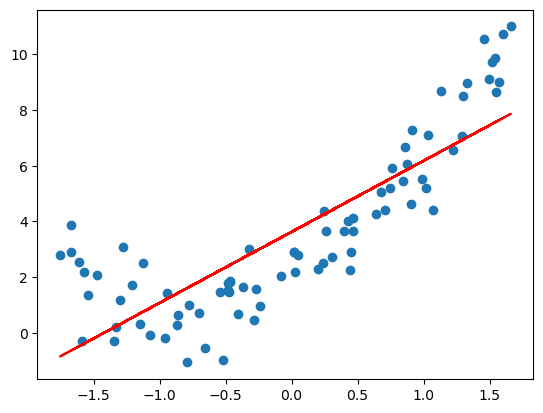

In [30]:
plt.scatter(X_train,y_train)
plt.plot(X_train, regression.predict(X_train),color="r")
plt.show()

In [32]:
poly = PolynomialFeatures() # default degree=3 , include_bias=True

In [33]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [34]:
X_train_poly

array([[ 1.00000000e+00,  2.47633535e-01,  6.13223675e-02],
       [ 1.00000000e+00,  1.45565669e+00,  2.11893639e+00],
       [ 1.00000000e+00, -5.40182671e-01,  2.91797318e-01],
       [ 1.00000000e+00, -7.00039198e-01,  4.90054879e-01],
       [ 1.00000000e+00,  1.56862116e+00,  2.46057233e+00],
       [ 1.00000000e+00,  9.87568378e-01,  9.75291302e-01],
       [ 1.00000000e+00,  4.48640749e-01,  2.01278522e-01],
       [ 1.00000000e+00,  1.54377517e+00,  2.38324178e+00],
       [ 1.00000000e+00,  1.33219938e+00,  1.77475518e+00],
       [ 1.00000000e+00, -4.80410926e-01,  2.30794658e-01],
       [ 1.00000000e+00,  3.92892957e-01,  1.54364876e-01],
       [ 1.00000000e+00, -6.57456685e-01,  4.32249293e-01],
       [ 1.00000000e+00,  4.42663768e-01,  1.95951211e-01],
       [ 1.00000000e+00, -8.72131603e-01,  7.60613533e-01],
       [ 1.00000000e+00, -1.57257044e+00,  2.47297780e+00],
       [ 1.00000000e+00, -4.70184630e-01,  2.21073587e-01],
       [ 1.00000000e+00, -8.36083500e-02

In [39]:
regression = LinearRegression()
regression.fit(X_train_poly,y_train)
                             

LinearRegression()

In [40]:
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test,y_pred)
print(score)

0.7685687698788558


In [41]:
regression.coef_

array([[0.        , 2.63871762, 1.54959954]])

In [42]:
regression.intercept_

array([2.07667643])

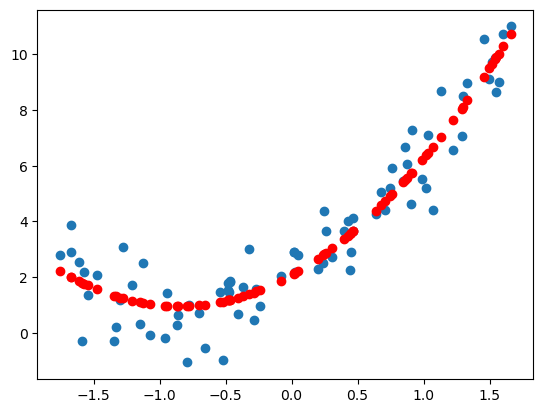

In [44]:
plt.scatter(X_train,y_train)
plt.scatter(X_train, regression.predict(X_train_poly),color="r")
plt.show()

In [45]:
poly = PolynomialFeatures(degree=3, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [46]:
regression = LinearRegression()
regression.fit(X_train_poly,y_train)
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test,y_pred)
print(score)

0.7573443621401051


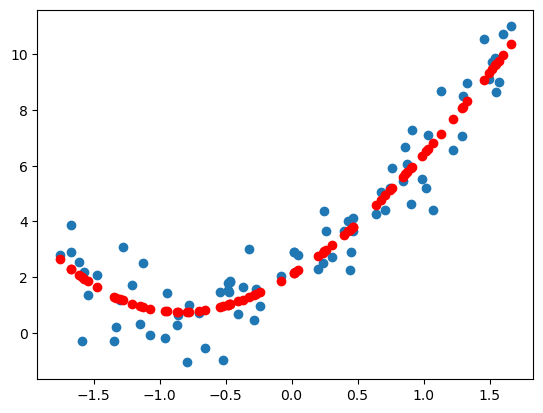

In [47]:
plt.scatter(X_train,y_train)
plt.scatter(X_train, regression.predict(X_train_poly),color="r")
plt.show()

In [48]:
# new data

In [49]:
new_df = pd.read_csv('3-newdatas.csv')

In [50]:
new_df

,0
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397
...,...
195,2.879397
196,2.909548
197,2.939698
198,2.969849


In [53]:
new_df.rename(columns ={"0": "Customer Satisfaction"},inplace=True)

In [56]:
new_df

,Customer Satisfaction
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397
...,...
195,2.879397
196,2.909548
197,2.939698
198,2.969849


In [65]:
X_new = new_df

In [66]:
X_new =scaler.fit_transform(X_new)


In [67]:
X_new_poly = poly.transform(X_new)

In [68]:
y_new = regression.predict(X_new_poly)

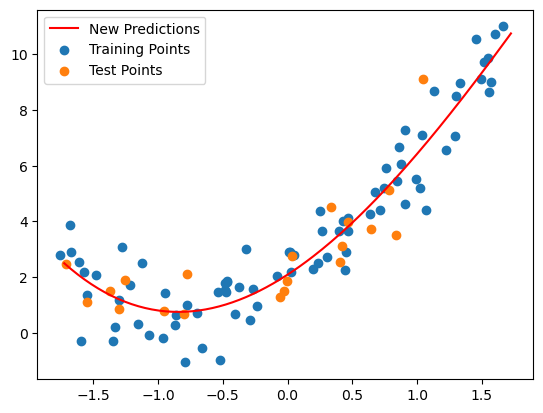

In [74]:
plt.plot(X_new,y_new,"r", label="New Predictions")
plt.scatter(X_train,y_train,label="Training Points")
plt.scatter(X_test,y_test,label="Test Points")
plt.legend()
plt.show()

In [75]:
#pipeline

In [89]:
def poly_regression(degree):
    poly_features = PolynomialFeatures(degree=degree)
    lin_reg = LinearRegression()
    scaler = StandardScaler()
    pipeline = Pipeline([
        ("standart_scaler",scaler),
        ("poly_features", poly_features),
        ("lin_reg" ,lin_reg)
    ])
    pipeline.fit(X_train,y_train)
    score = pipeline.score(X_test,y_test)
    print("R2 score:",score)

    y_pred_new = pipeline.predict(X_new)
    plt.plot(X_new,y_pred_new,"r", label="New Predictions")
    plt.scatter(X_train,y_train,label="Training Points")
    plt.scatter(X_test,y_test,label="Test Points")
    plt.legend()
    plt.show()

R2 score: 0.27056525356222416


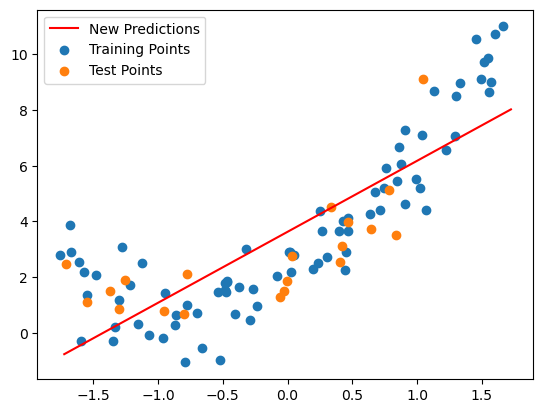

In [90]:
poly_regression(1)

R2 score: 0.7573443621401051


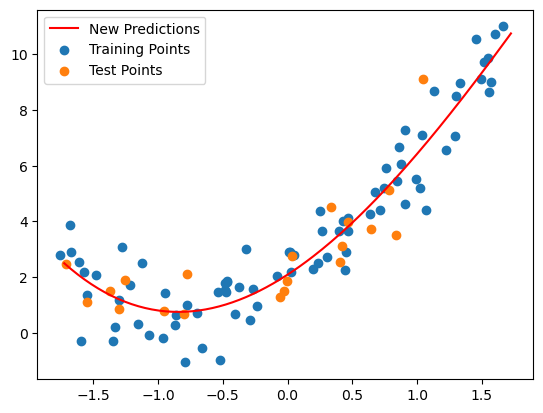

In [91]:
poly_regression(3)

R2 score: 0.27056525356222416


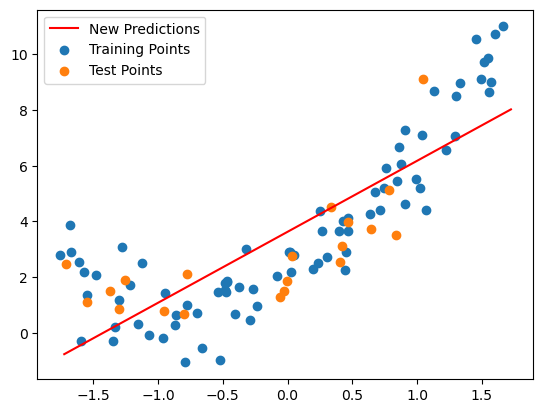

R2 score: 0.7685687698788558


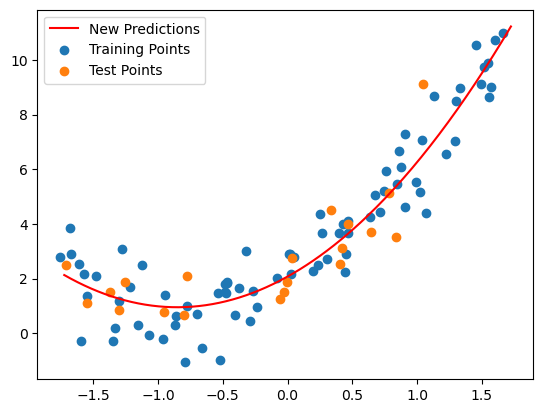

R2 score: 0.7573443621401051


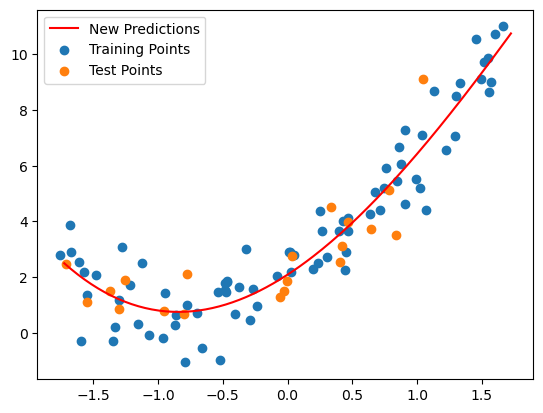

R2 score: 0.7355034443260418


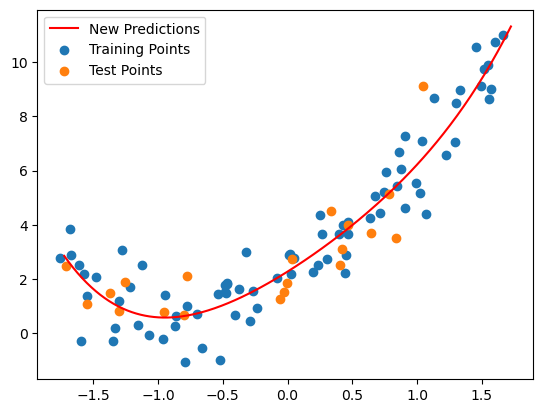

R2 score: 0.7351244165095401


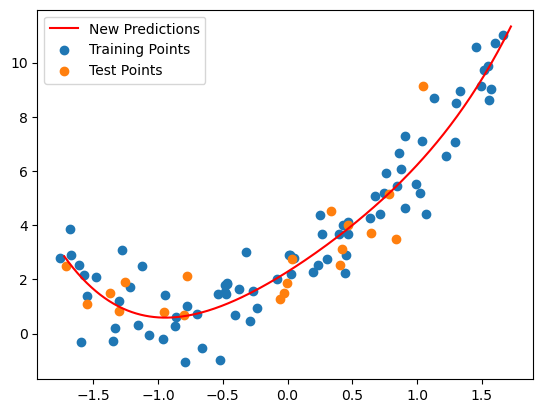

R2 score: 0.7343590482133431


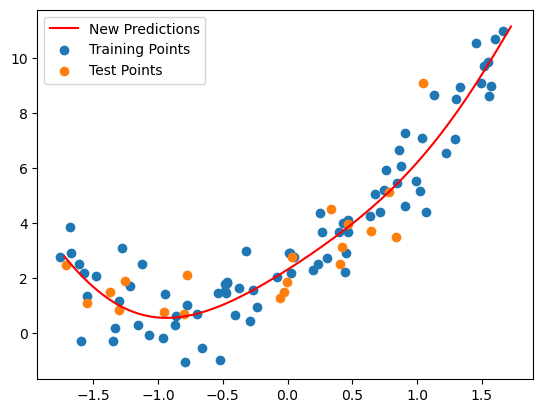

R2 score: 0.7347819263549458


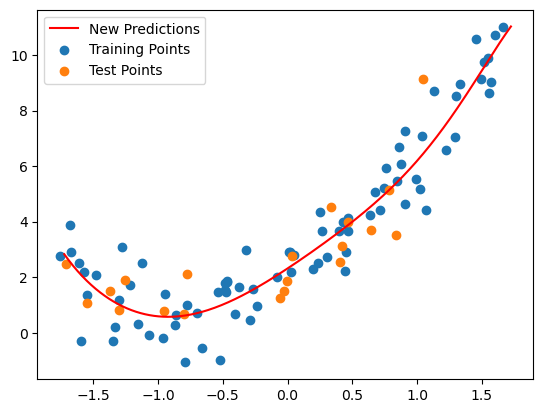

R2 score: 0.7411422099998386


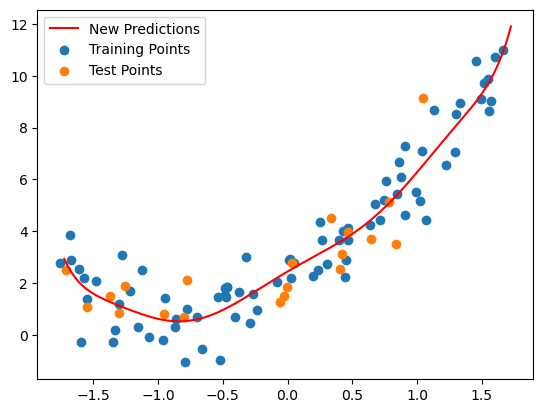

R2 score: 0.7310763879815905


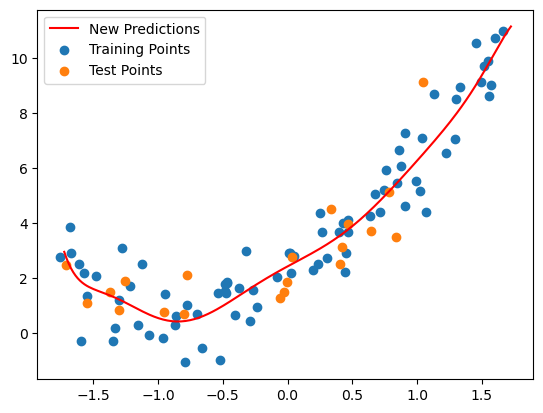

R2 score: 0.728057862123286


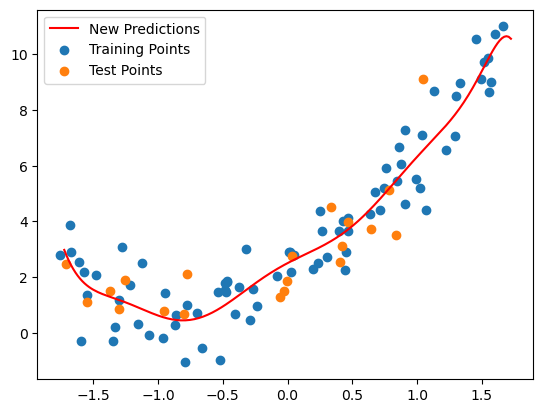

In [96]:
for degree in range(1,11):  #[1,2,3,4,5,6,7,8,9,10]
    poly_regression(degree)